## **Prediction using Supervised ML**

## **Problem statement:**
Predict the percentage of an student based on the no. of study hours.
Data is provided for plotting and analysis.
Use of simple linear regression with 2 variables.
What will be predicted score if a student studies for 9.25 hrs/ day?

## **Author: Meetkumar Deshani**

**Importing All required libraries** 

In [34]:
# Importing all libraries required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Input file URL for reading the data to use**

In [12]:
# Reading data from remote link

url = "http://bit.ly/w-data"
stdt = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


**Understating the data and cheking for null values**

In [13]:
stdt.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
stdt.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [15]:
stdt.shape

(25, 2)

In [16]:
stdt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [33]:
stdt.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [37]:
#if there is any NULL value present we can use mean values to fill it.
# stdt.mean()
# stdt2=stdt.fillna(stdt.mean())

By observing data we can say that there is no NULL value present so there is no need for data cleaning. We can plot the data for futher analysis.

**Plotting the data points to check which analysis can be done**

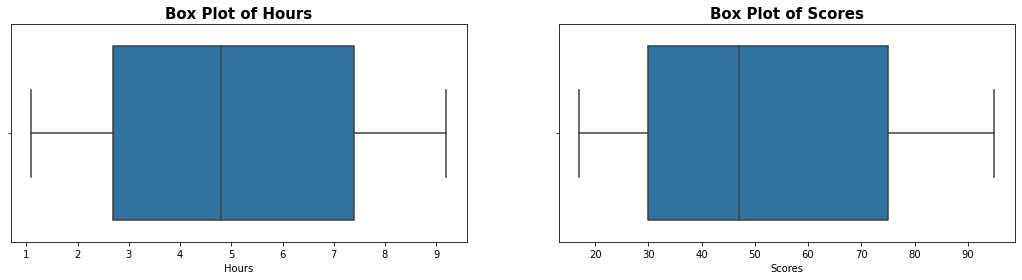

In [35]:
# Univariate analysis
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(x = 'Hours', data = stdt)
plt.title('Box Plot of Hours', fontweight = 'bold', fontsize = 15)
plt.subplot(1,2,2)
sns.boxplot(x = 'Scores', data = stdt)
plt.title('Box Plot of Scores',fontweight = 'bold', fontsize = 15)

plt.show()

There are no outliers present in the dataset.

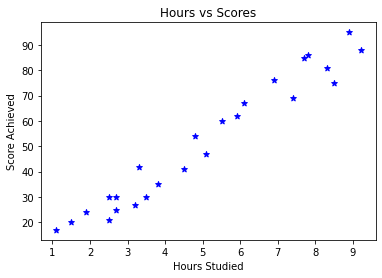

In [17]:
# 2-D plot of scores to see distribution of data

%matplotlib inline
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score Achieved')
plt.scatter(stdt.Hours, stdt.Scores, color = 'blue', marker = '*')

We can clearly see that all data points are forming linearity. So it is feasible to do linear regression with error calculation.

**Preparing the data**

This will be performed by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 80% of the data in the train dataset and the rest 20% in the test dataset

In [19]:
# Preparing the data for regression as Input and Output 

X = stdt.iloc[:, :-1].values  
Y = stdt.iloc[:, 1].values  

In [21]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

In [36]:
# Checking the shapes for all the sets
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', Y_train.shape)
print('Y_test: ', y_test.shape)

X_train:  (20, 1)
X_test:  (5, 1)
Y_train:  (20,)
Y_test:  (5,)


In [22]:
from sklearn.linear_model import LinearRegression  
LrReg = LinearRegression()  
LrReg.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


**applying the linear regression**

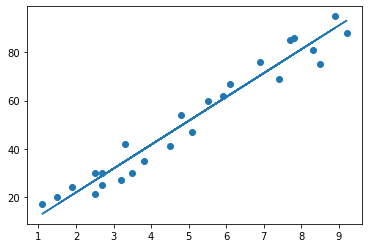

In [24]:
# Plotting the regression line as Y=mX+C
line = LrReg.coef_*X+LrReg.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

**Evalution of plot and checking the error**

In [25]:
pr=LrReg.predict(X_test)

In [26]:
list(zip(Y_test,pr))

[(20, 16.884144762398037),
 (27, 33.73226077948984),
 (69, 75.35701799818723),
 (30, 26.794801243040276),
 (62, 60.491033277223885)]

In [27]:
from sklearn.metrics import mean_squared_error #for Root Mean Square Error

In [28]:
mean_squared_error(Y_test,pr,squared=False)

4.6474476121003665

**Prediction for required value**

In [30]:
hour =[9.25]
ReqPr=LrReg.predict([hour])
print("For required {} hours, predicted score is as below:".format(hour))
print("Predicted Score = {}".format(ReqPr[0]))

For required [9.25] hours, predicted score is as below:
Predicted Score = 93.69173248737538
